# Regularized Logistic regression

### 반도체 공장에서 2번의 테스트 점수 기반으로 chip의 합격, 불합격을 가려보도록 하자. 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
%matplotlib inline

In [114]:
path = os.getcwd() + '/data/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])

In [115]:
data2?

In [71]:
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [72]:
positive = data2[data2['Accepted'].isin([1])]

In [73]:
positive.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [74]:
negative = data2[data2['Accepted'].isin([0])]

In [75]:
negative.head()

,Test1,Test2,Accepted
58,0.18376,0.93348,0
59,0.22408,0.77997,0
60,0.29896,0.61915,0
61,0.50634,0.75804,0
62,0.61578,0.72880,0


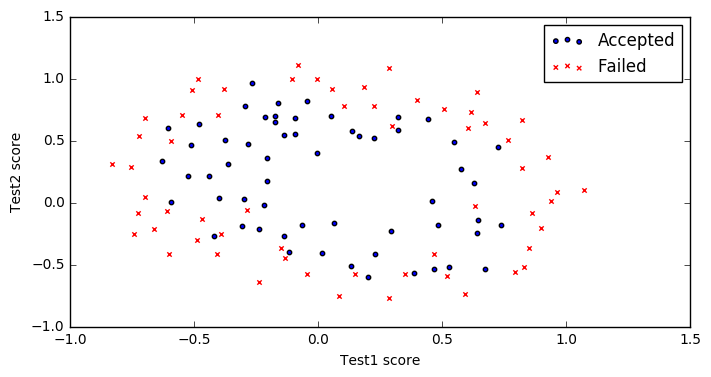

In [79]:
# 그림을 그려서 보자

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(positive['Test1'], positive['Test2'], s=10, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=10, c='r', marker='x', label='Failed')
ax.legend()
ax.set_xlabel('Test1 score')
ax.set_ylabel('Test2 score')

In [80]:
# linear로는 Decision Boundary를 그릴 수 없기 때문에 
# 이럴 때 사용할 수 있는 방법 중의 하나는 
# 원래의 feature들을 활용해서 polynomial을 만드는 것이다.

degree = 5
x1 = data2['Test1']
x2 = data2['Test2']

In [81]:
x1.head()

0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
Name: Test1, dtype: float64

In [82]:
x2.head()

0    0.69956
1    0.68494
2    0.69225
3    0.50219
4    0.46564
Name: Test2, dtype: float64

In [83]:
data2.insert(3, 'Ones', 1)

In [84]:
data2.head()

,Test1,Test2,Accepted,Ones
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [85]:
for i in range(1, degree):
    for j in range(0,i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

In [86]:
data2.head()

,Test1,Test2,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,0.051267,0.69956,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,-0.092742,0.68494,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,-0.213710,0.69225,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,-0.375000,0.50219,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,-0.513250,0.46564,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [87]:
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)

In [88]:
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [99]:
# 데이터를 다시 만들어 주자.

X2 = data2.iloc[:,1:12]
y2 = data2.iloc[:,0:1]

In [100]:
X2.head()

,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [101]:
y2.head()

,Accepted
0,1
1,1
2,1
3,1
4,1


In [102]:
X2 = np.array(X2)
y2 = np.array(y2)

theta2 = np.zeros(X2.shape[1])

lambda_value = 1

In [104]:
X2.shape, y2.shape, theta2.shape

((118, 11), (118, 1), (11,))

In [105]:
# sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [106]:
# Cost fn with regularization

def costFunctionReg(theta, X, y, lambda_value):
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    multiplication1 = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    multiplication2 = np.multiply((1 - y), np.log(1 - sigmoid(X*theta.T)))
    
    reg = lambda_value/(2*(X.shape[0])) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return sum(multiplication1 - multiplication2) / (X.shape[0]) + reg

In [111]:
# GD with regularization

def gradientDescentReg(theta, X, y, lambda_value):
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    grad = np.zeros(theta.shape[1])    
    error = sigmoid(X * theta.T) - y
    
    for i in range(theta.shape[1]):
        term = np.multiply(error, X[:,i])
        reg = lambda_value/X.shape[0] * theta[:,i]
        if i==0:
            grad[i] = np.sum(term) / X.shape[0]
        else:
            grad[i] = np.sum(term) / X.shape[0] + reg
    
    return grad

In [112]:
costFunctionReg(theta2, X2, y2, lambda_value)

matrix([[ 0.69314718]])

In [113]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costFunctionReg, x0=theta2, fprime=gradientDescentReg, args=(X2, y2, lambda_value))  
result2

(array([  0.35875239,  -3.22364082,  18.96832415,  -4.25752829,
         18.23360845,  20.36242038,   8.94139434, -43.77191053,
        -17.92612048, -50.74286599,  -2.83393473]), 103, 1)

In [121]:
def predict(theta, X):
    probability = sigmoid(X*theta.T)
    return [1 if x>= 0.5 else 0 for x in probability]

In [123]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]  
accuracy = (sum(map(int, correct)) % len(correct))  

print 'accuracy = {0}%'.format(accuracy)  

accuracy = 91%
